In [72]:
# Analyse de données
import pandas as pd
import numpy as np
from datetime import datetime
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [73]:
df = pd.read_csv('raw_data/carData.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [75]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [76]:
# Variables quantitatives

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Feature enginnering, Stratification, Standardisation

In [93]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [77]:
# Ajout de la variable âge : Car_Age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

In [78]:
# Stratification de 'Selling_Price' en 'Price_Category', limité à 5 valeurs
df['Price_Category'] = np.ceil(df['Selling_Price'] /1.5)
df['Price_Category'] = df['Price_Category'].where(df['Price_Category'] <5, 5.0)


In [79]:
# Standardisation des kilométrages, 3 méthodes AU CHOIX

scaler = MinMaxScaler()
df['Kms_Scaled'] = scaler.fit_transform(df[['Kms_Driven']])

scaler = StandardScaler()
df['Kms_Std'] = scaler.fit_transform(df[['Kms_Driven']])

scaler = RobustScaler()
df['Kms_Robust'] = scaler.fit_transform(df[['Kms_Driven']])


df['Kms_Log'] = np.log1p(df['Kms_Driven'])  # log(1 + x) pour éviter log(0)

In [80]:
# Standardisation des Prix d'usine et de vente
scaler = StandardScaler()
df[['Selling_Price_Std', 'Present_Price_Std']] = scaler.fit_transform(df[['Selling_Price', 'Present_Price']])

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Car_Age'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Price_Category'}>,
        <Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Scaled'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >, <Axes: >]],
      dtype=object)

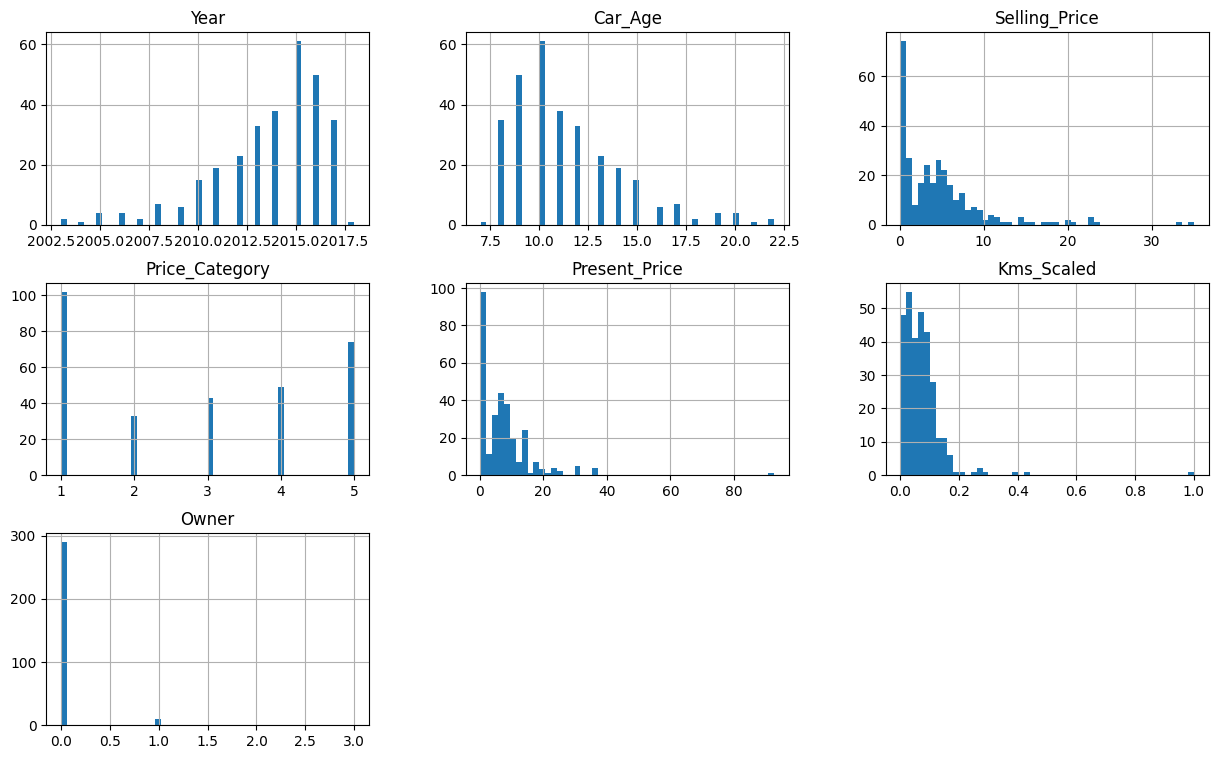

In [81]:
# Visualisation des différentes valeurs des variables quantitatives ou ordinales
df_organized = df[['Year', 'Car_Age','Selling_Price', 'Price_Category', 'Present_Price','Kms_Scaled','Owner']]
df_organized.hist(bins=50, figsize=(15,9))

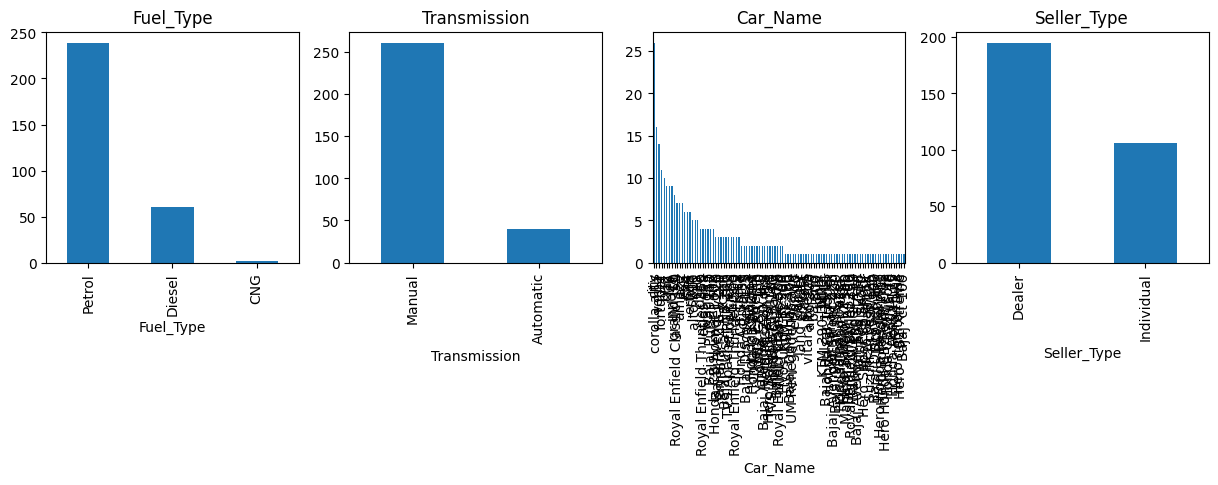

In [82]:
# Visualisation des différentes valeurs des variables catégorielles
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

colonnes = ['Fuel_Type', 'Transmission', 'Car_Name', 'Seller_Type']

for ax, col in zip(axes.flatten(), colonnes):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)



### Chercher des corrélation
La fonction **scatter_matrix** de Pandas permet de croiser 2 à 2 toutes les variables quantitatives (numérique)

array([[<Axes: xlabel='Car_Age', ylabel='Car_Age'>,
        <Axes: xlabel='Selling_Price', ylabel='Car_Age'>,
        <Axes: xlabel='Present_Price', ylabel='Car_Age'>,
        <Axes: xlabel='Kms_Scaled', ylabel='Car_Age'>,
        <Axes: xlabel='Owner', ylabel='Car_Age'>],
       [<Axes: xlabel='Car_Age', ylabel='Selling_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Scaled', ylabel='Selling_Price'>,
        <Axes: xlabel='Owner', ylabel='Selling_Price'>],
       [<Axes: xlabel='Car_Age', ylabel='Present_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Kms_Scaled', ylabel='Present_Price'>,
        <Axes: xlabel='Owner', ylabel='Present_Price'>],
       [<Axes: xlabel='Car_Age', ylabel='Kms_Scaled'>,
        <Axes: xlabel='Selling_Price', ylabel='Kms_Scaled'>,
  

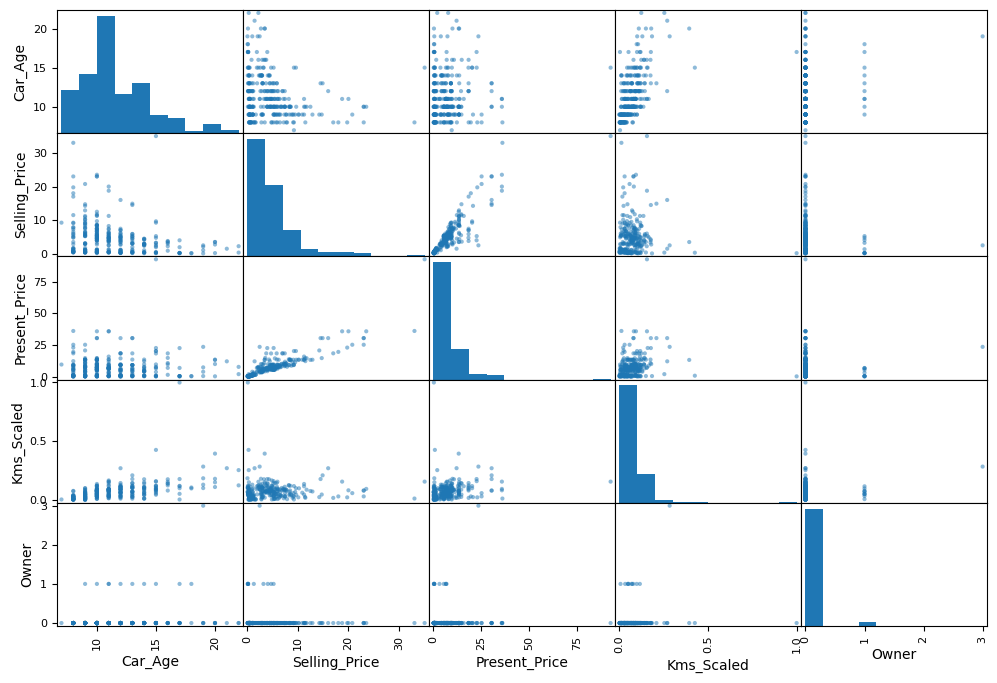

In [83]:
attributes = ['Transmission','Car_Age','Selling_Price','Present_Price','Kms_Scaled','Owner']
scatter_matrix(df[attributes], figsize=(12, 8))

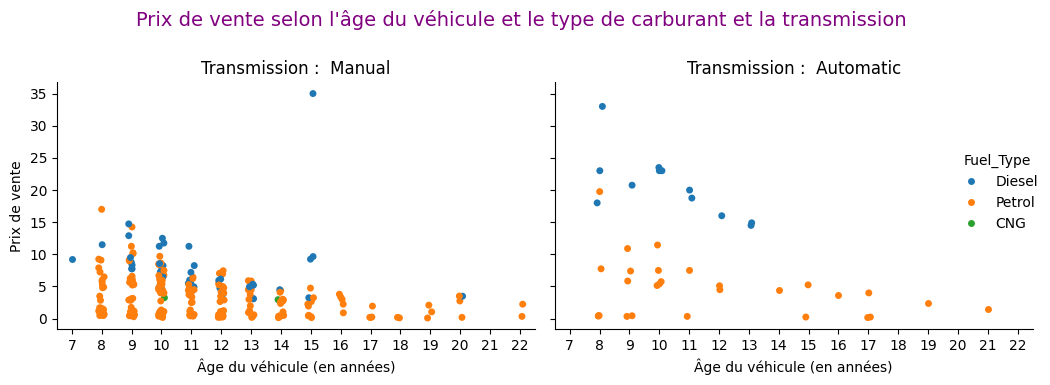

In [84]:
age_fuel_transmission_price = sns.catplot(
    x="Car_Age", 
    y="Selling_Price", 
    hue="Fuel_Type",     # Une couleur par type de carburant
    col="Transmission",  # Une colonne par type de transmission
    data=df, 
    kind="strip",  # Type de graphique
    height=4,  # Taille de chaque graphique
    aspect=1.2,  # Largeur du graphique
    legend=True
)

# Titre global
age_fuel_transmission_price.fig.suptitle(
    "Prix de vente selon l'âge du véhicule et le type de carburant et la transmission", 
    color="purple",
    fontsize=14, 
    y=0.95
)

# Accéder aux axes dans le FacetGrid et ajuster les labels
for ax in age_fuel_transmission_price.axes.flat:
    # Modifier les labels des axes
    ax.set_xlabel("Âge du véhicule (en années)")
    ax.set_ylabel("Prix de vente")
    
    # Ajouter un sous-titre pour chaque graphique
    ax.set_title(f"Transmission : {ax.get_title().split('=')[-1]}", fontsize=12)

# Ajuster l'espacement entre les graphiques pour éviter les chevauchements
plt.tight_layout(rect=[0, 0, 1, 0.95])  

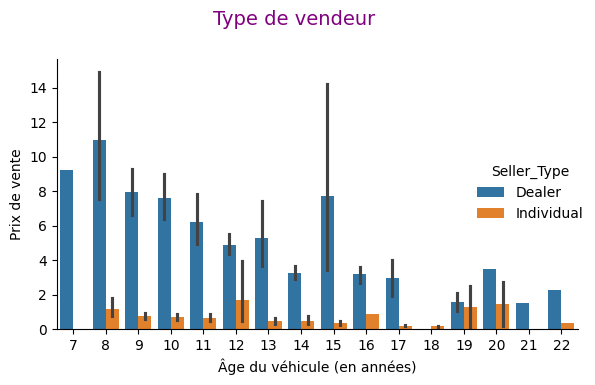

In [85]:
# Age / Prix de vente
age_price = sns.catplot(
    x="Car_Age", 
    y="Selling_Price", 
    hue="Seller_Type",     # Une couleur par type de carburant
    # col="Transmission",  # Une colonne par type de transmission
    data=df, 
    kind="bar",  # Type de graphique
    height=4,  # Taille de chaque graphique
    aspect=1.2,  # Largeur du graphique
    legend=True
)

# Titre global
age_price.fig.suptitle(
    "Type de vendeur", 
    color="purple",
    fontsize=14, 
    y=0.95
)

plt.xlabel("Âge du véhicule (en années)")
plt.ylabel("Prix de vente")

plt.tight_layout(rect=[0, 0, 1, 0.95])  


In [86]:
# Sélectionner les colonnes numériques
df_numeric = df[["Year", "Selling_Price", "Present_Price", "Kms_Driven", 
                  "Fuel_Type_numeric", "Seller_Type_numeric", "Transmission_numeric", "Owner"]]

KeyError: "['Fuel_Type_numeric', 'Seller_Type_numeric', 'Transmission_numeric'] not in index"

## Recherche de corrélation

La conversion de variables qualitatives en variables quantitatives pour calculer une matrice de corrélation n'est pas pertinente.
Il vaut mieux n'utiliser que les variables quantitatives ou ordinal ( Owner ) du jeu de données :
- Car_Age
- Selling_Price
- Present_Price
- Kms_Driven
- Owner

Le prix de vente semble correlé positivement avec :
- le prix de départ-usine

Le prix de vente semble correlé négativement avec :
- l'âge du véhicule
- le nombre de propriétaire
- les km parcourus impactent faiblement le prix

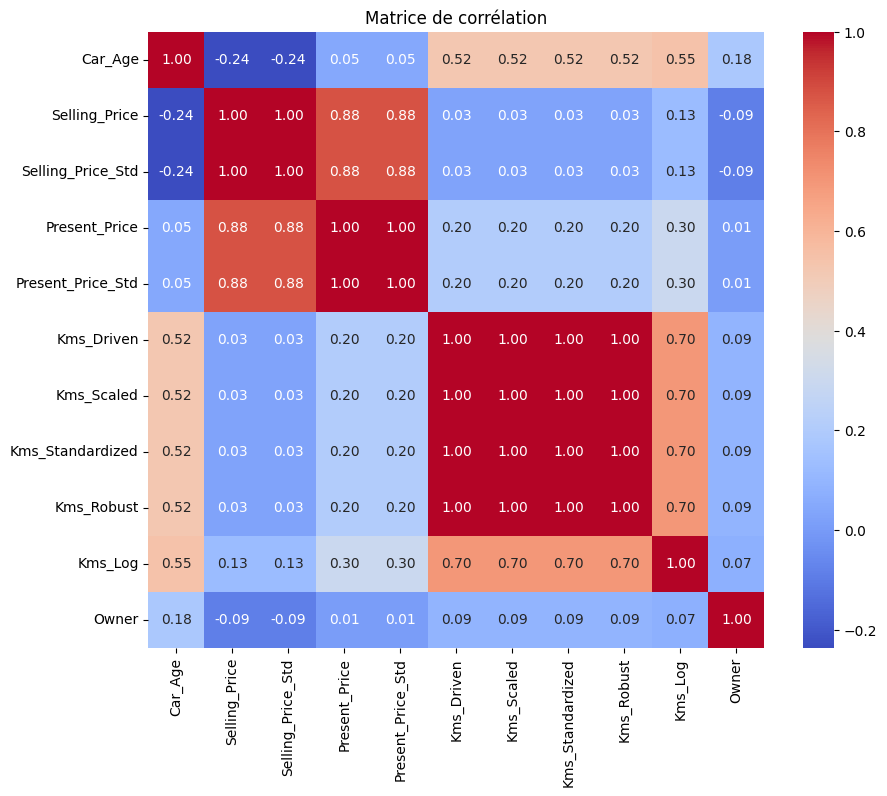

In [ ]:
columns_to_keep = ['Car_Age', 'Selling_Price', 'Selling_Price_Std', 'Present_Price', 'Present_Price_Std', 'Kms_Driven','Kms_Scaled', 'Kms_Standardized', 'Kms_Robust', 'Kms_Log', 'Owner'
    ]

# Filtrer le DataFrame pour ne garder que les colonnes spécifiées
df_filtered = df[columns_to_keep]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()